This code calculates the Feldman-Cousins critical value for 90% confidence interval. This is needed due to low statistics and edge boundary. Please see https://arxiv.org/abs/physics/9711021 for more information on process.

To calculate the critical values, many data challenge trials using simulated data need to be fit. Each data challenge trial is let fit in the same method as the analysis and then fit again fixing the parameters to the input values to create the trial. The difference between the fit log-likelihoods between these two fits are calculated for each trial. The distribution of these differences are used to find the 90% containment for each injected parameter. The value that corresponds to the 90% containment is the new critical value for finding the 90% confidence interval of the analysis.

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import plottertools
import matplotlib.text as txt
from matplotlib.colors import LogNorm
from matplotlib import gridspec
plt.rcParams.update({'font.size': 18})
import glob
import sys

%matplotlib inline
def logsum(arr):
    return np.log10(np.sum(arr))

In [2]:
#Load in fits performed on simulated data challenge trials. 

files=glob.glob("/data/user/lwille/FC/FC219/*")
files.sort()

FC219 = {}

#Reading in log-likelihood differences between the two fits.
#Discard fits that failed. Fits can fail due to a number of reasons, usually fixed by changing initial fit guess.
for f in files:
    print f
    x = np.loadtxt(f, dtype=str, delimiter='|')
    delta = np.zeros(10000)

    for i, item in enumerate(x[51::54]):
        try:
            if float(item[12:]) > 0:
                delta[i] = float(item[12:])
        except:
            print item
    for i, item in enumerate(x[20::54]):
        try:
            if float(item[12:]) > 0:
                delta[i] += -float(item[12:])
            else:
                delta[i] = -1
        except:
            print item
    tempname = x[0]
    FC219[f[29::]] = delta

/data/user/lwille/FC/FC219/FC1.0
/data/user/lwille/FC/FC219/FC10.0
/data/user/lwille/FC/FC219/FC11.0
/data/user/lwille/FC/FC219/FC12.0
/data/user/lwille/FC/FC219/FC13.0
/data/user/lwille/FC/FC219/FC14.0
/data/user/lwille/FC/FC219/FC15.0
/data/user/lwille/FC/FC219/FC16.0
/data/user/lwille/FC/FC219/FC17.0
/data/user/lwille/FC/FC219/FC18.0
/data/user/lwille/FC/FC219/FC19.0
/data/user/lwille/FC/FC219/FC2.0
/data/user/lwille/FC/FC219/FC20.0
/data/user/lwille/FC/FC219/FC21.0
/data/user/lwille/FC/FC219/FC22.0
/data/user/lwille/FC/FC219/FC23.0
/data/user/lwille/FC/FC219/FC24.0
/data/user/lwille/FC/FC219/FC25.0
/data/user/lwille/FC/FC219/FC26.0
/data/user/lwille/FC/FC219/FC27.0
/data/user/lwille/FC/FC219/FC28.0
/data/user/lwille/FC/FC219/FC29.0
/data/user/lwille/FC/FC219/FC3.0
/data/user/lwille/FC/FC219/FC30.0
/data/user/lwille/FC/FC219/FC31.0
/data/user/lwille/FC/FC219/FC32.0
/data/user/lwille/FC/FC219/FC33.0
/data/user/lwille/FC/FC219/FC34.0
/data/user/lwille/FC/FC219/FC35.0
/data/user/lwille

In [12]:
files=glob.glob("/data/user/lwille/FC/219*.txt")
files.sort()

profiles = {}

#Reading in the likelihood parameter space scan for the real data analysis.
for f in files:
    print f
    x = np.loadtxt(f, dtype=str, delimiter='|')
    LLH = np.zeros((2,101))
    for i, item in enumerate(x[32::21]):
        LLH[0,i] = float(item[:-8].split(' ')[2])

    for i, item in enumerate(x[33::21]):
        LLH[1,i] = float(item[12:])
    tempname = x[0]
    profiles[f[21:-8:]] = LLH

/data/user/lwille/FC/219scan.txt


In [5]:
#Finding the parameter dependant 90% confidence interval critical value.

deltaLLh219 = np.zeros((2,99))
for j, norm in enumerate(FC219.keys()):
    bins = np.linspace(0,np.max(FC219[norm]),10000)
    entry = np.digitize(FC219[norm],bins)

    binvalue = np.zeros(10000-1)

    for i, item in enumerate(entry):
        if item == 0 or item == len(bins):
            continue
        binvalue[item-1] += 1
    for i, item in enumerate(np.cumsum(binvalue)):
        if item > 0.9*np.sum(binvalue):
            deltaLLh219[0,j] = np.float(norm)
            deltaLLh219[1,j] = bins[i]
            break


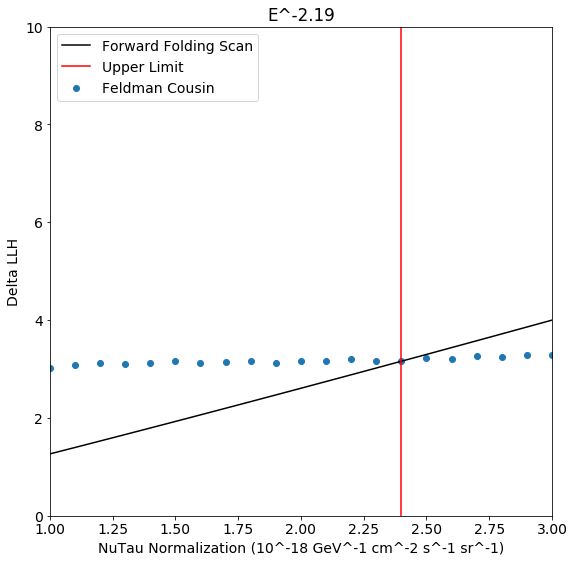

In [17]:
#Plotting the Feldman-Cousins critical values and the likelihood scan of the analysis. The point where these two points cross over determines the 90% confidence interval.

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(9,9))

plt.scatter(deltaLLh219[0]/10.,deltaLLh219[1],label='Feldman Cousin')
plt.plot(profiles['219'][0]/10.,profiles['219'][1]-profiles['219'][1,0],color='black', label='Forward Folding Scan')
plt.axvline(2.4,color='red',label = 'Upper Limit')
plt.legend()
plt.ylim(0,10)
plt.xlim(1,3)
plt.xlabel('NuTau Normalization (10^-18 GeV^-1 cm^-2 s^-1 sr^-1)')
plt.ylabel('Delta LLH')
#plt.savefig('FCscan29.pdf')
plt.title('E^-2.19')
plt.show()